# Plot and figures

In [2]:
import pykasso as pk
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.lines as mlines
import matplotlib.pyplot as plt


In [3]:
catchment = pk.SKS('inputs/tsanfleuron598x789.yaml') 
catchment.set_parameter('faults_mode', 'csv')  
catchment.update_feature('faults')  

CAUTION: You are using the development version of this package.


In [4]:
faults

ID : 5 | Type : faults | Shape : (789, 598, 1) | Mode : null

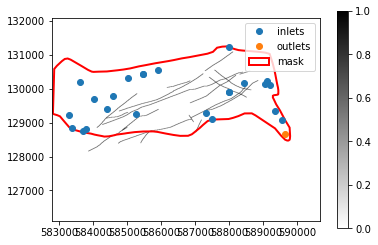

AttributeError: 'Figure' object has no attribute 'plt'

In [15]:
f = catchment.show_catchment(data_key='faults')
#f.set_size_inches(20,20)


In [16]:
faults

ID : 5 | Type : faults | Shape : (789, 598, 1) | Mode : null

In [5]:
catchment.compute_karst_network()


 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd



 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


C:\Users\measdaya\Anaconda3\envs\pykasso\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


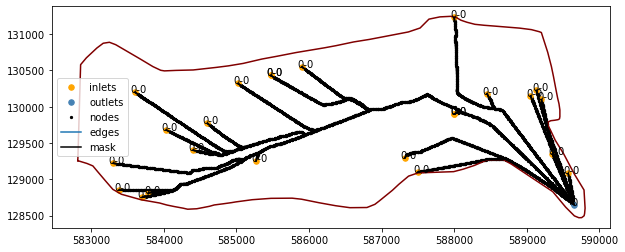

In [8]:
catchment.compute_karst_network()
f = catchment.show_network()
f

In [9]:
data = catchment.karst_simulations[-1]

In [28]:
data.points['inlets']

,x,y,outlet,outletx,outlety,inlet_iteration,iteration
0,588000.0,129900.0,0.0,589650.0,128650.0,0,0.0
1,587500.0,129100.0,0.0,589650.0,128650.0,0,0.0
2,584400.0,129400.0,0.0,589650.0,128650.0,0,0.0
3,583786.0,128813.0,0.0,589650.0,128650.0,0,0.0
4,585270.0,129250.0,0.0,589650.0,128650.0,0,0.0
5,587320.0,129295.0,0.0,589650.0,128650.0,0,0.0
6,583700.0,128750.0,0.0,589650.0,128650.0,0,0.0
7,588000.0,131230.0,0.0,589650.0,128650.0,0,0.0
8,588450.0,130180.0,0.0,589650.0,128650.0,0,0.0
9,583380.0,128850.0,0.0,589650.0,128650.0,0,0.0


In [4]:
data = catchment.karst_simulations[-1]
closed_polygon = catchment.mask.vertices[:]

In [10]:
#catchment.set_parameter('fractures_mode', 'null')  
#catchment.update_feature('fractures') 
catchment.compute_karst_network()


 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


## Inlets, Outlets, Fracture figures


 This network contains  1  connected components

Computing:
 - mean length,cv length,length entropy,mean tortuosity
 - orientation entropy,aspl,cpd,md,cv degree,cvd


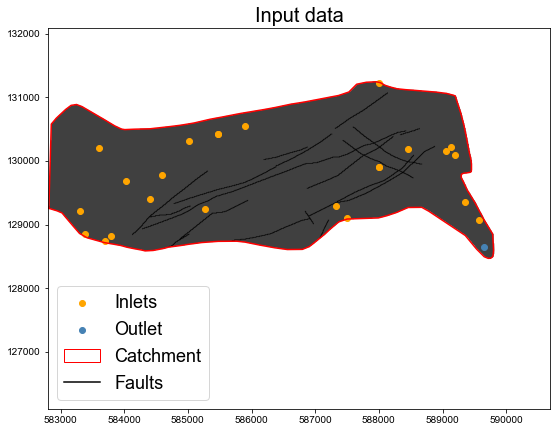

In [9]:
#simulations
catchment.compute_karst_network()
#objet à définir pour la figure
data = catchment.karst_simulations[-1]
closed_polygon = catchment.mask.vertices[:]
#font = arial
plt.rcParams.update({'font.family':'Arial'})
#début de la figure
fig = plt.figure(figsize=(9,8))
d = data.maps['cost'][-1]
d = np.transpose(d, (1,0))
closed_polygon = catchment.mask.vertices[:]
closed_polygon.append(closed_polygon[0])
x,y = zip(*closed_polygon)
plt.plot(x,y, color='red', label='mask')
i = plt.scatter(data.points['inlets'].x,  data.points['inlets'].y,  c='orange')
o = plt.scatter(data.points['outlets'].x, data.points['outlets'].y, c='steelblue')
p = matplotlib.patches.Rectangle((0,0),0,0, ec='r', fc='none')
faults = mlines.Line2D([], [], color='black',
                          markersize=15, label='faults')
plt.imshow(d, extent=catchment.grid.extent, origin = 'lower', cmap='gray')
#plt.colorbar(shrink=0.5)
plt.legend([i,o,p,faults], ['Inlets', 'Outlet', 'Catchment','Faults'], loc='lower left',fontsize = 18)
plt.title('Input data',fontsize=20)
plt.show()

In [5]:
fig.savefig('failles.png', dpi=400)

NameError: name 'generate_imshow_demo_grid' is not defined